# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics


# Read Datasets

In [2]:
train = pd.read_csv('train.csv', index_col='PassengerId')
test = pd.read_csv('test.csv', index_col='PassengerId')

# Data Exploartion and Preprocessing

#### -->> Describe train and test data [Number of non null data, mean, standard deviations, minumum, maximum, quantiles] 
#### -->> Print first and last 5 rows of the two data sets using function (.head , .tail)
#### -->> Describe shape of the two datasets, their columns' names and their data types

In [3]:
boxtrain=train.describe()
boxtrain

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [4]:
boxtest=test.describe()
boxtest

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
print(train.head())

             Pclass                                               Name  \
PassengerId                                                              
1                 3                            Braund, Mr. Owen Harris   
2                 1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3                 3                             Heikkinen, Miss. Laina   
4                 1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5                 3                           Allen, Mr. William Henry   

                Sex   Age  SibSp  Parch            Ticket     Fare Cabin  \
PassengerId                                                                
1              male  22.0      1      0         A/5 21171   7.2500   NaN   
2            female  38.0      1      0          PC 17599  71.2833   C85   
3            female  26.0      0      0  STON/O2. 3101282   7.9250   NaN   
4            female  35.0      1      0            113803  53.1000  C123   
5              male  35.0

In [6]:
print(test.head())

             Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

              Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
PassengerId                                                       
892          34.5      0      0   330911   7.8292   NaN        Q  
893          47.0      1      0   363272   7.0000   NaN        S  
894          62.0      0      0   240276   9.6875   NaN        Q  
895          27.0      0      0   315154   8.6625   NaN        S  
896          22.0      1      1  3101298  12.2875   NaN   

In [7]:
print(train.tail())

             Pclass                                      Name     Sex   Age  \
PassengerId                                                                   
887               2                     Montvila, Rev. Juozas    male  27.0   
888               1              Graham, Miss. Margaret Edith  female  19.0   
889               3  Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
890               1                     Behr, Mr. Karl Howell    male  26.0   
891               3                       Dooley, Mr. Patrick    male  32.0   

             SibSp  Parch      Ticket   Fare Cabin Embarked  Survived  
PassengerId                                                            
887              0      0      211536  13.00   NaN        S         0  
888              0      0      112053  30.00   B42        S         1  
889              1      2  W./C. 6607  23.45   NaN        S         0  
890              0      0      111369  30.00  C148        C         1  
891           

In [8]:
print(test.tail())

             Pclass                          Name     Sex   Age  SibSp  Parch  \
PassengerId                                                                     
1305              3            Spector, Mr. Woolf    male   NaN      0      0   
1306              1  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
1307              3  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
1308              3           Ware, Mr. Frederick    male   NaN      0      0   
1309              3      Peter, Master. Michael J    male   NaN      1      1   

                         Ticket      Fare Cabin Embarked  
PassengerId                                               
1305                  A.5. 3236    8.0500   NaN        S  
1306                   PC 17758  108.9000  C105        C  
1307         SOTON/O.Q. 3101262    7.2500   NaN        S  
1308                     359309    8.0500   NaN        S  
1309                       2668   22.3583   NaN        C  


In [9]:
print(train.shape)
print("*********************")
print(train.columns)
print("*********************")
print(train.info())

(891, 11)
*********************
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')
*********************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


In [10]:
print(test.shape)
print("*********************")
print(test.columns)
print("*********************")
print(test.info())

(418, 10)
*********************
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')
*********************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None


### Analysis on Data with Visualization

##### Get mean of each feature according to survived or not

In [11]:
train.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


##### Number of males and females on titanic

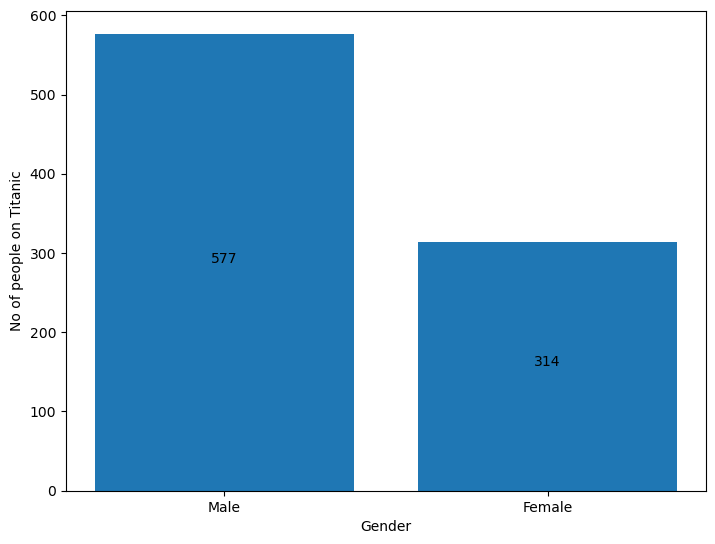

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
maleNo = len(train[train['Sex'] == 'male'])
femaleNo = len(train[train['Sex'] == 'female'])
index = [maleNo,femaleNo]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of people on Titanic")
def addlabels(gender,index):
    for i in range(len(gender)):
        plt.text(i, index[i]//2, index[i], ha = 'center')
addlabels(gender, index)

plt.show()

#### Number of people who survived and dead

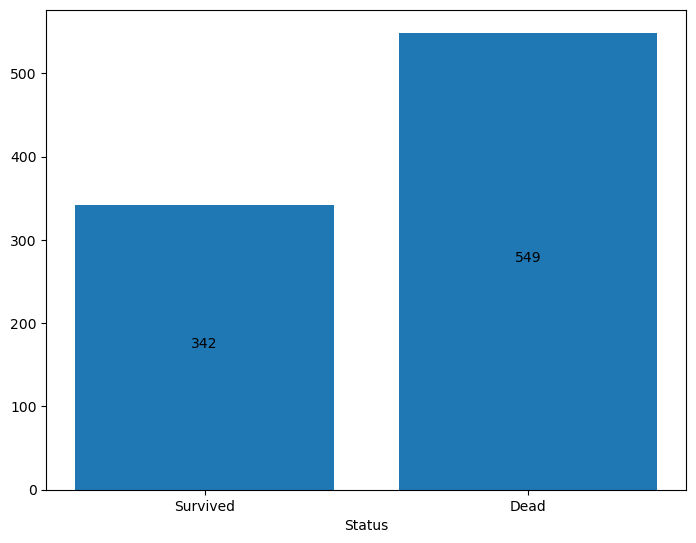

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Dead']
survived = len(train[train['Survived'] == 1])
dead = len(train[train['Survived'] == 0])
ind = [survived,dead]
def addlabels(status,ind):
    for i in range(len(status)):
        plt.text(i, ind[i]//2, ind[i], ha = 'center')
addlabels(status, ind)
ax.bar(status,ind)
plt.xlabel("Status")
plt.show()

#### Number of people survived and didn't surrvive accoring to their Pclass

Text(0.5, 1.0, 'People dead according to Pclass')

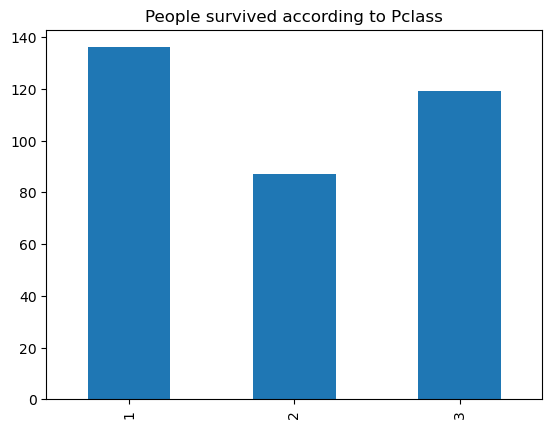

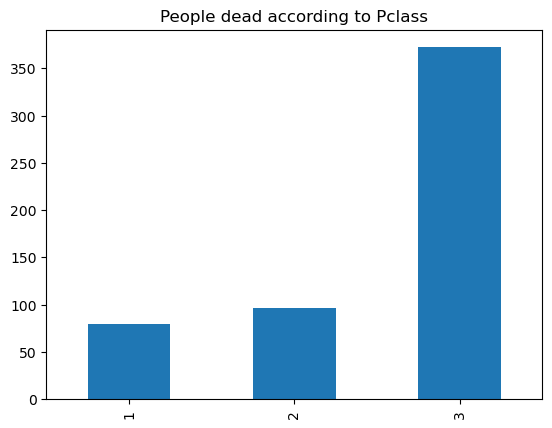

In [14]:
plt.figure(1)
train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('People survived according to Pclass')


plt.figure(2)
train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('People dead according to Pclass')

#### Number of people survived and didn't surrvive accoring to their Age

([<matplotlib.axis.XTick at 0x1b3a1a26d90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

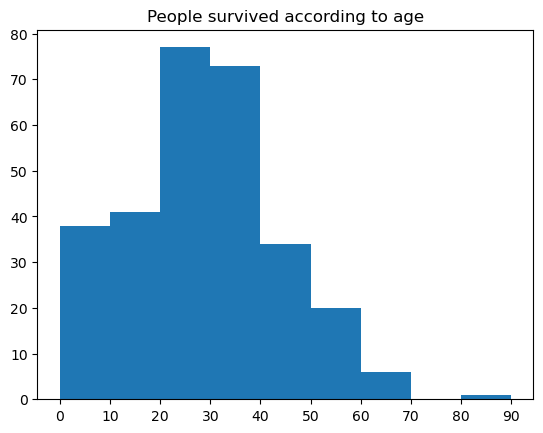

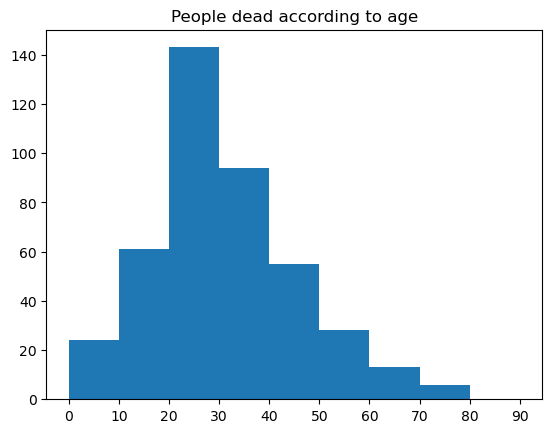

In [15]:
plt.figure(1)
age  = train.loc[train.Survived == 1, 'Age']
plt.title('People survived according to age')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))


plt.figure(2)
age  = train.loc[train.Survived == 0, 'Age']
plt.title('People dead according to age')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

##### Mean of females and males who survived 
##### Plot this mean and their actual count

In [16]:
MeanSexSurvived= train.groupby('Sex')[['Survived']].mean()
MeanSexSurvived

,Survived
Sex,
female,0.742038
male,0.188908


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


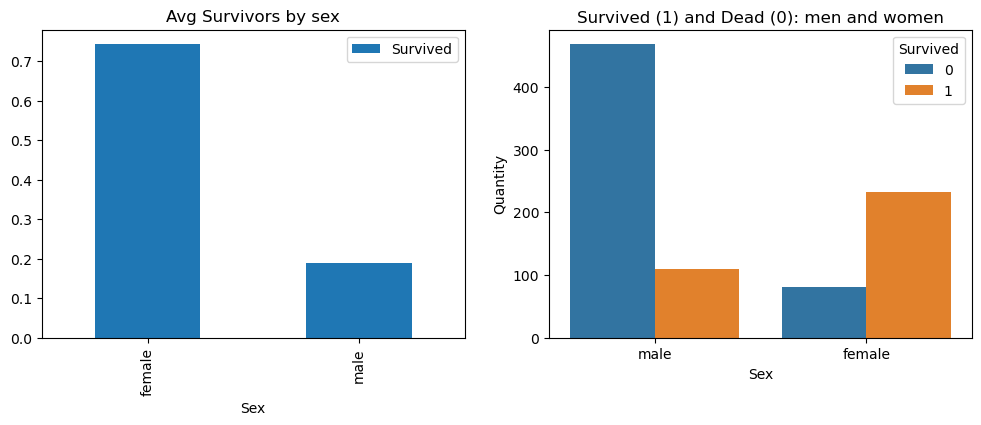

In [17]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
MeanSexSurvived.plot.bar(ax=ax[0])
ax[0].set_title('Avg Survivors by sex')
sns.countplot('Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived (1) and Dead (0): men and women')
plt.show()

##### Mean of survived people according to their number of sibilings
##### Plot this mean and their actual count 

In [18]:
MeanSibSurvived= train.groupby('SibSp')[['Survived']].mean()
MeanSibSurvived

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


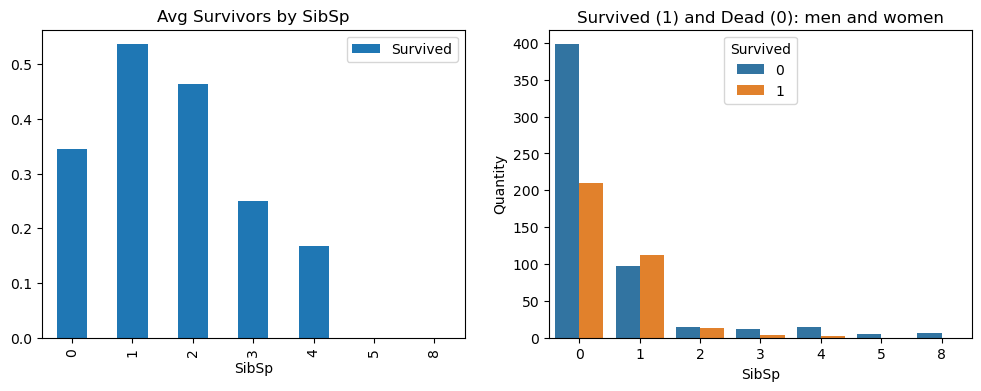

In [19]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
MeanSibSurvived.plot.bar(ax=ax[0])
ax[0].set_title('Avg Survivors by SibSp')
sns.countplot('SibSp', hue='Survived', data=train, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived (1) and Dead (0): men and women')
plt.show()

##### Mean of survived people according Embarked
##### Plot this mean and their actual count 

In [20]:
MeanEmbSurvived = train.groupby('Embarked')[['Survived']].mean()
MeanEmbSurvived

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


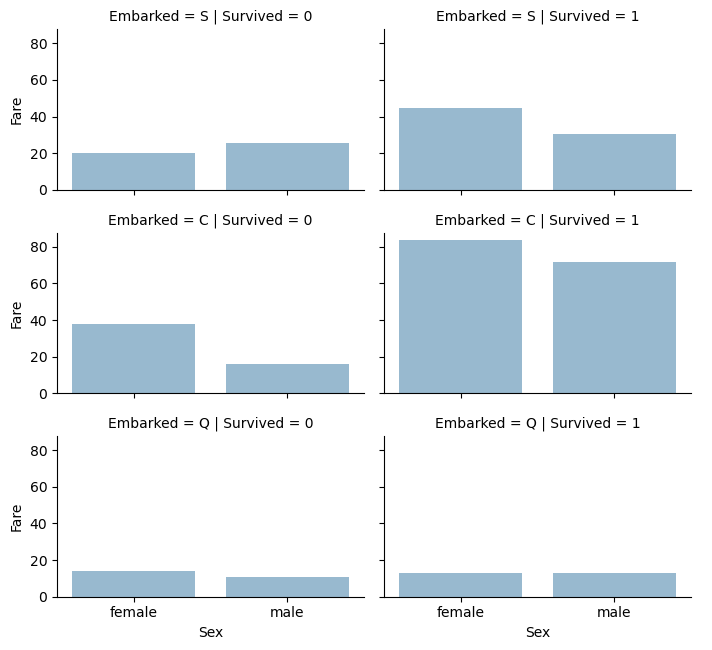

In [21]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

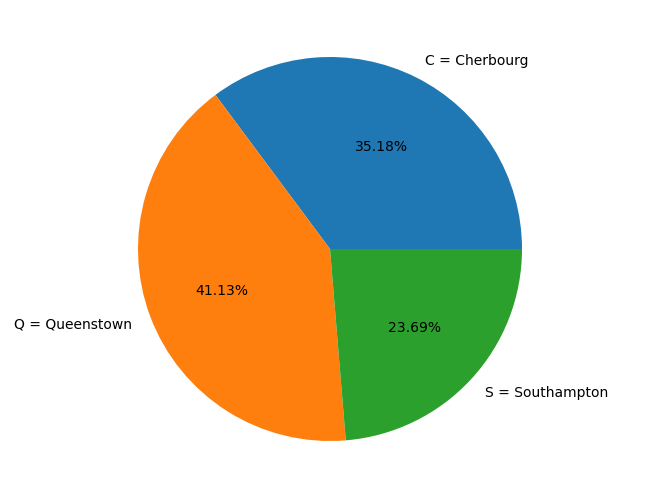

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.387500,0.453125,0.260970]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

### Handeling Missing Values and Outliers

Check the number of null in train and test data

In [23]:
train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Survived      0
dtype: int64

In [24]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

Replace all null data in train and test data with NaN

In [25]:
train.replace('', np.nan, inplace = True)
train.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [26]:
test.replace('', np.nan, inplace = True)
test.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Check which port of embarkation the most then will replace th NaN of it in train data with this port of embarkation 

In [27]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
train["Embarked"].replace(np.nan, "S", inplace=True)

Get mean of age in train and test data and replace all the NaN with these means

In [29]:
x_mean=train['Age'].mean()
train['Age'].fillna(x_mean,inplace=True)
x_mean2=test['Age'].mean()
test['Age'].fillna(x_mean2,inplace=True)

Get the mean fare of test data and replace the NaN with this mean

In [30]:
x_mean1=test['Fare'].mean()
test['Fare'].fillna(x_mean,inplace=True)

Check again the null data

In [31]:
train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Survived      0
dtype: int64

In [32]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

Put the train data in boxplot to see the outliers

<AxesSubplot:>

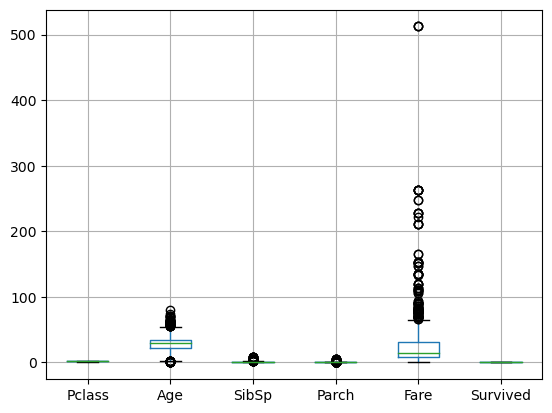

In [33]:
numeric_col = ['Pclass','Age','SibSp','Parch','Fare','Survived']
categorical_col = ['Name','Sex','Ticket','Cabin']
train.boxplot(numeric_col)

--> Remove outliers by calculating the first and third quantile

--> Then get the interquantile range by subtracting 1st quantile from 3rd quantile, 

--> Estimate the Lower and Upper bound and replace data points that lie outside of the lower and the upper bound with null value

<AxesSubplot:>

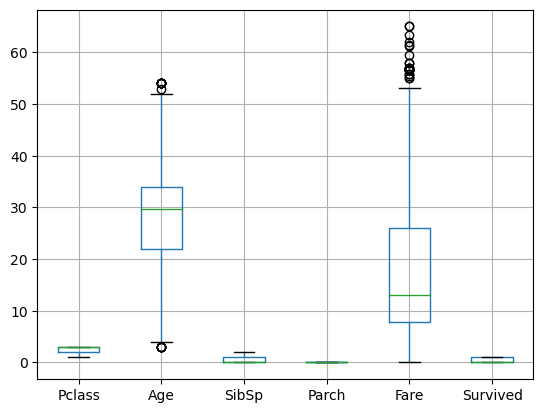

In [34]:
for x in numeric_col:
    q75,q25 = np.percentile(train.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train.loc[train[x] < min,x] = np.nan
    train.loc[train[x] > max,x] = np.nan
train.boxplot(numeric_col)

Drop the cabin, Name, and Ticket columns as they are not relevent to the upcoming analysis of data

In [35]:
train.drop(['Cabin','Name','Ticket'], axis=1, inplace = True)
test.drop(['Cabin','Name','Ticket'], axis=1, inplace = True)
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
1,3.0,male,22.0,1.0,0.0,7.250,S,0.0
2,1.0,female,38.0,1.0,0.0,NaN,C,1.0
3,3.0,female,26.0,0.0,0.0,7.925,S,1.0
4,1.0,female,35.0,1.0,0.0,53.100,S,1.0
5,3.0,male,35.0,0.0,0.0,8.050,S,0.0


In [36]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [37]:
train.dtypes

Pclass      float64
Sex          object
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked     object
Survived    float64
dtype: object

--> For easily analysis, Replace the data of Sex and Embarked with the dummy variables. It will put 1 for the true value to make its type float instead of object 

In [38]:
dummy_variable_1_train = pd.get_dummies(train["Sex"])
dummy_variable_1_test = pd.get_dummies(test["Sex"])

Merge data of column Sex then drop the original Sex column

In [39]:
train = pd.concat([train, dummy_variable_1_train], axis=1)
test = pd.concat([test, dummy_variable_1_test], axis=1)
train.drop("Sex", axis = 1, inplace=True)
test.drop("Sex", axis = 1, inplace=True)

In [40]:
dummy_variable_2_train = pd.get_dummies(train["Embarked"])
dummy_variable_2_test = pd.get_dummies(test["Embarked"])

Merge data from column Embarked then drop the original column embarked

In [41]:
train = pd.concat([train, dummy_variable_2_train], axis=1)
test = pd.concat([test, dummy_variable_2_test], axis=1)
train.drop("Embarked", axis = 1, inplace=True)
test.drop("Embarked", axis = 1, inplace=True)

Replace the infinte data in train and test datasets with NaN then drop the rows with NaN

In [42]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.dropna(inplace=True)

test.replace([np.inf, -np.inf], np.nan, inplace=True)
test.dropna(inplace=True)

In [43]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,female,male,C,Q,S
PassengerId,,,,,,,,,,,
1,3.0,22.000000,1.0,0.0,7.2500,0.0,0,1,0,0,1
3,3.0,26.000000,0.0,0.0,7.9250,1.0,1,0,0,0,1
4,1.0,35.000000,1.0,0.0,53.1000,1.0,1,0,0,0,1
5,3.0,35.000000,0.0,0.0,8.0500,0.0,0,1,0,0,1
6,3.0,29.699118,0.0,0.0,8.4583,0.0,0,1,0,1,0


Convert all float data to int

In [44]:
train['Age'] = train['Age'].astype('int')
train['Fare'] = train['Fare'].astype('int')
train['SibSp'] = train['SibSp'].astype('int')
train['Parch'] = train['Parch'].astype('int')
train['Pclass'] = train['Pclass'].astype('int')

test['Age'] = test['Age'].astype('int')
test['Fare'] = test['Fare'].astype('int')
test['SibSp'] = test['SibSp'].astype('int')
test['Parch'] = test['Parch'].astype('int')
test['Pclass'] = test['Pclass'].astype('int')

In [45]:
test.head() 

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
PassengerId,,,,,,,,,,
892,3,34,0,0,7,0,1,0,1,0
893,3,47,1,0,7,1,0,0,0,1
894,2,62,0,0,9,0,1,0,1,0
895,3,27,0,0,8,0,1,0,0,1
896,3,22,1,1,12,1,0,0,0,1


### Train Data

In [46]:
X_train = train.drop(['Survived'], axis=1)
y_Train = train["Survived"]

In [47]:
X_test = test
X_test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
female    0
male      0
C         0
Q         0
S         0
dtype: int64

In [48]:
X_test.shape

(418, 10)

Feature Scaling

In [49]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Split X_train into X_train_train and X_train_test for gaining more insights

In [50]:
X_train_train,X_train_test,y_train_train,y_train_test = train_test_split(X_train,y_Train, test_size = 0.25, random_state = 42)

In [51]:
X_train_train

array([[-0.68542024,  2.16695679, -0.44823494, ..., -0.40120543,
        -0.35320863,  0.5766832 ],
       [-0.68542024, -0.299417  , -0.44823494, ..., -0.40120543,
        -0.35320863,  0.5766832 ],
       [-2.04917017,  1.10993945,  1.80073514, ..., -0.40120543,
        -0.35320863,  0.5766832 ],
       ...,
       [-0.68542024, -0.18197063,  1.80073514, ..., -0.40120543,
        -0.35320863,  0.5766832 ],
       [ 0.67832969, -0.06452426, -0.44823494, ..., -0.40120543,
         2.83118791, -1.73405434],
       [ 0.67832969, -0.06452426, -0.44823494, ..., -0.40120543,
        -0.35320863,  0.5766832 ]])

In [52]:
X_train_test

array([[-2.04917017,  1.81461767, -0.44823494, ..., -0.40120543,
        -0.35320863,  0.5766832 ],
       [ 0.67832969, -0.06452426,  1.80073514, ..., -0.40120543,
         2.83118791, -1.73405434],
       [ 0.67832969,  0.17036848, -0.44823494, ..., -0.40120543,
        -0.35320863,  0.5766832 ],
       ...,
       [-0.68542024,  0.75760033, -0.44823494, ...,  2.49248872,
        -0.35320863, -1.73405434],
       [ 0.67832969, -0.06452426, -0.44823494, ..., -0.40120543,
        -0.35320863,  0.5766832 ],
       [-2.04917017, -0.41686338, -0.44823494, ...,  2.49248872,
        -0.35320863, -1.73405434]])

In [53]:
y_train_train

PassengerId
464    0.0
222    0.0
578    1.0
808    0.0
398    0.0
      ... 
109    0.0
162    1.0
427    1.0
681    0.0
155    0.0
Name: Survived, Length: 432, dtype: float64

In [54]:
y_train_test

PassengerId
188    1.0
613    1.0
798    1.0
151    0.0
688    0.0
      ... 
133    0.0
350    0.0
293    0.0
30     0.0
890    1.0
Name: Survived, Length: 145, dtype: float64

# KNN

Implement range of random 5 odd numbers for k with the KNN algorithm and predict on the training model and get the best k value

In [72]:
import random
odd_rand_list = [random.randrange(1,50,2) for p in range(0,5)]
k_values = odd_rand_list  
k_values
best_accuracy = 0.0
best_k = None

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_train, y_train_train)
    y_predTrain = knn_model.predict(X_train_train)
    accuracy = round(accuracy_score(y_train_train, y_predTrain)*100,2)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
print("Best k value:", best_k)
print(best_accuracy)

Best k value: 1
94.44


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Evaluation Matrix for the training model

[[269  28]
 [ 52  83]]
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       297
         1.0       0.75      0.61      0.67       135

    accuracy                           0.81       432
   macro avg       0.79      0.76      0.77       432
weighted avg       0.81      0.81      0.81       432



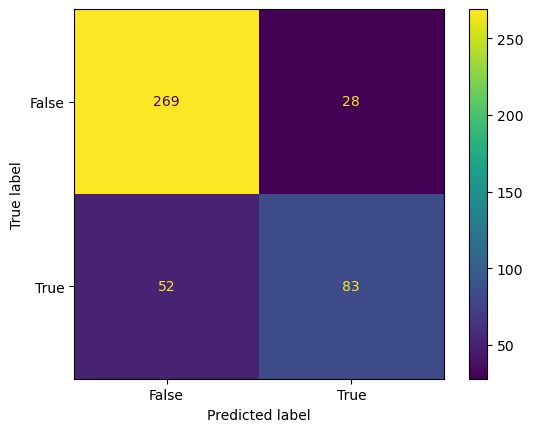

In [73]:
confusion_mat = confusion_matrix(y_train_train,y_predTrain)
print(confusion_mat)
print(classification_report(y_train_train,y_predTrain))


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()


Impact of different distance metrices on the model's performance

In [74]:
distance_metrics = ['euclidean', 'manhattan', 'cosine']

for metric in distance_metrics:
    knn = KNeighborsClassifier(metric=metric)

    knn.fit(X_train_train, y_train_train)

    y_pred = knn.predict(X_train_train)

    accuracy = round(accuracy_score(y_train_train, y_pred)*100,2)
    print(f"Accuracy with {metric} distance metric: {accuracy}")


Accuracy with euclidean distance metric: 86.11
Accuracy with manhattan distance metric: 86.34
Accuracy with cosine distance metric: 85.19


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Manhattan's accuracy is more than the 2 other distance  metrices

Select the best K value and apply the model to the testing set for predictions

In [58]:
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train_train, y_train_train)
y_pred_test = best_knn_model.predict(test)
y_pred_test


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

# Naive Bayes

Implement the naive bayes algorithm for prediction

In [59]:
gaussian = GaussianNB()
gaussian.fit(X_train_train, y_train_train)
Y_predNB_train = gaussian.predict(X_train_train)
accuracyNB = round(accuracy_score(y_train_train, Y_predNB_train)*100,2)
print(Y_predNB_train)
print(accuracyNB)


[0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.

Evaluation Matrix 

[[251  46]
 [ 39  96]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       297
         1.0       0.68      0.71      0.69       135

    accuracy                           0.80       432
   macro avg       0.77      0.78      0.77       432
weighted avg       0.81      0.80      0.80       432



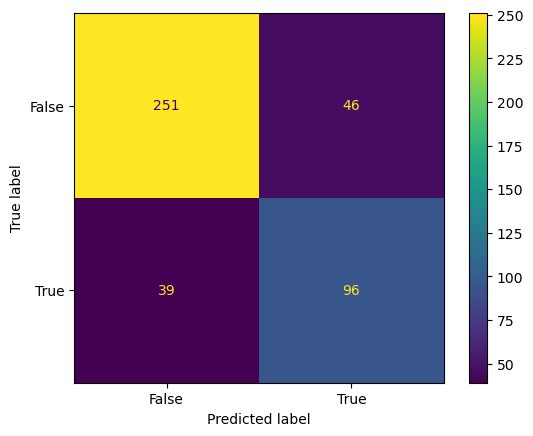

In [60]:
confusion_matr = confusion_matrix(y_train_train,Y_predNB_train)
print(confusion_matr)
print(classification_report(y_train_train,Y_predNB_train))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matr, display_labels = [False, True])
cm_display.plot()
plt.show()

In [61]:
gaussian = GaussianNB()
gaussian.fit(X_train_train, y_train_train)
Y_predNB = gaussian.predict(test)
Y_predNB

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### ANN

In [62]:
clf=MLPClassifier(hidden_layer_sizes=(120,), activation='relu',solver='adam', max_iter=1000)

In [63]:
clf.fit(X_train_train, y_train_train)

MLPClassifier(hidden_layer_sizes=(120,), max_iter=1000)

In [64]:
compare=y_train_train==clf.predict(X_train_train)

In [65]:
compare

PassengerId
464     True
222     True
578     True
808    False
398     True
       ...  
109     True
162     True
427     True
681    False
155     True
Name: Survived, Length: 432, dtype: bool

In [66]:
correctly_classified=compare[compare].count()
correctly_classified

361

In [67]:
size=y_train_train.count()
acc_ANN=(correctly_classified/size)*100
acc_ANN

83.56481481481481

In [68]:
print(classification_report(y_train_train,compare))

              precision    recall  f1-score   support

         0.0       0.32      0.08      0.12       297
         1.0       0.24      0.64      0.35       135

    accuracy                           0.25       432
   macro avg       0.28      0.36      0.24       432
weighted avg       0.30      0.25      0.20       432



[[ 23 274]
 [ 48  87]]


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


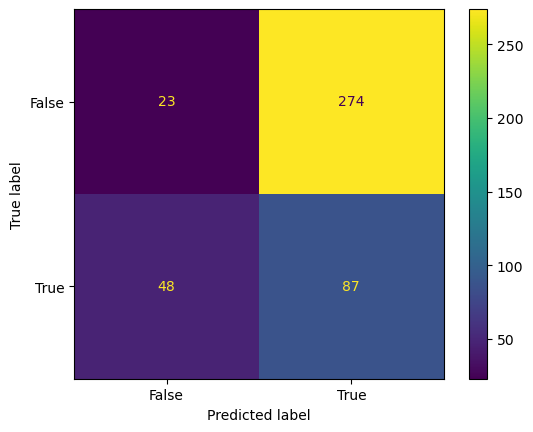

In [69]:
cnf_matrix=confusion_matrix(y_train_train,compare)
print(cnf_matrix)
ANN_Pred=clf.predict(test)
ANN_Pred
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


### Comparison of 3 Algorithms based on the evaluation metrices obtained

In [70]:
models = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 'ANN'],
    'Score': [best_accuracy, accuracyNB, acc_ANN]}).set_index('Model')
models.sort_values(by='Score', ascending=False)

,Score
Model,
ANN,83.564815
KNN,81.020000
Naive Bayes,80.320000


### The strengths and weaknesses of each algorithm

###### KNN: 
It has advantages - > nonparametric architecture, simple and powerful, requires no traning time, but it also has disadvantage - > memory intensive, classification and estimation are slow.
###### Naive Bayes:
It has advantages - > It is simple and easy to implement, It doesn’t require as much training data, It is fast and can be used to make real-time predictions, but it also has disadvantage - > This algorithm faces the ‘zero-frequency problem’ where it assigns zero probability to a categorical variable whose category in the test data set wasn’t available in the training dataset, Its estimations can be wrong in some cases.
###### ANN:
It has advantages - > Ability to work with incomplete knowledge, Having fault tolerance, but it also has disadvantage - > they can often create incomplete results or outputs.

###  Which algorithm performs better in predicting the survival status of passengers.

In the above confusion metrices, the percision of Naive Bayes 96, the most percision, So Naive Bayes performs better in predicting the survival status of passengers


## Summarize
##### First, we cleaned data from null data, irrelevant data, and converting to integeres and make it easily to make the analysis on it
##### Second, We splitted the train data to train and test to train it then perform this training model in the test set to predict the survivors
##### Then, we performed KNN algorithm by training it and plotting the confusion matix and compare between the different distances, then performed the trained model on the test data for prediction and giving the accuracy
##### Then we do the same in naive bayes and ANN
##### Then compared between them according to the accuracy and precision